<a href="https://colab.research.google.com/github/uol-mediaprocessing/group-projects-image-restauration/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group H: Restoration of Damaged Images

Group members:

- Sören Gade
- Florian Meyer

**Definition**: Image restoration is the process of reversing processes that damaged the image. The objective of image restoration techniques is to reduce noise and recover resolution loss.
(see https://en.wikipedia.org/wiki/Image_restoration)

## Goals

The following goals should be accomplished until the end of the project:

1. Independant restoration of damaged images.
   The application should be able to restore images without guidance.
2. Autonomous detection of defects in images.
   The application should detect defects that need repairing without guidance.

## Limitations

The following points make the goals more clear:

1. Damages should be clearly visible and discernable from the image's content.
2. Restoration only of images in grayscale or sepia color spaces.

# Scenarios

1. People discovering old photos that have been damaged by a poor storage environment (band marks, white areas).
2. Images that are split in multiple parts and need to be joined together seamlessly. The parts need to be fit together beforehand, letting the programm fill out damages and missing colors.

## Open tasks

- [ ] How to detect defects? Is threshold color detection sufficient?
- [ ] Define different sets of damages. ex: missing colors, wrong colors, missing pieces of image.
- [ ] Aquire more apropriate example images.

### Link collection

- https://towardsdatascience.com/how-to-perform-image-restoration-absolutely-dataset-free-d08da1a1e96d
- https://www.owlnet.rice.edu/~elec539/Projects99/BACH/proj2/intro.html
- https://www.slideshare.net/kalyanacharjya/image-restoration-40589017
- https://de.wikipedia.org/wiki/Inpainting
- http://www-inst.eecs.berkeley.edu/~ee225b/sp07/handouts/Image_Restoration_99.pdf
- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_photo/py_inpainting/py_inpainting.html
- Digital Restoration from Start to Finish: How to repair old and damaged photographs, ISBN 9781136098130


### Technical preparations

- Defects should be recognized without user-interaction or any other help

- OpenCV *imgproc* module (source: "Learning Image Processing with Python", ISBN 9781783287666, S.57), Inpainting
- Inpainting using grayscale mask Image (Raspberry Pi Computer vision programming, ISBN 9781784395605, S. 91)

## Setup

In [0]:
import matplotlib
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

def imread_mask(name):
  mask = cv2.imread(name)
  return mask[:, :, 0] # mask needs to be one channel only

In [0]:
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-image-restauration/master/src/sample01-damaged.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-image-restauration/master/src/sample01-mask.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-image-restauration/master/src/sample02-damaged.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-image-restauration/master/src/sample02-mask.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-image-restauration/master/src/sample03-damaged.jpg
! wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-image-restauration/master/src/sample03-mask.jpg

# Overview
In the following three samples the fundamental action of restoring images is displayed. First a damaged image is needed. After that a mask of a damaged image is needed. The mask shows the damaged areas so that the `inpaint` method in openCV can restore the image

# Sample 01
The damaged image

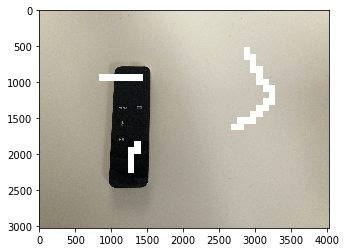

In [0]:
sample1 = cv2.imread("sample01-damaged.jpg")

plt.imshow(cv2.cvtColor(sample1, cv2.COLOR_BGR2RGB))

The mask of the first damaged image

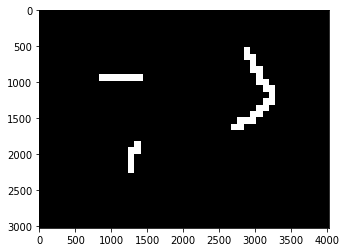

In [0]:
mask1 = imread_mask("sample01-mask.jpg")

plt.imshow(mask1, cmap='gray')

The restored image


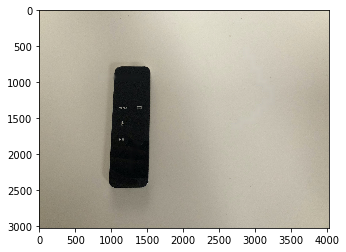

In [0]:
sample1 = cv2.imread("sample01-damaged.jpg")
mask1 = imread_mask("sample01-mask.jpg")

radius = 15
result1 = cv2.inpaint(sample1, mask1, radius, cv2.INPAINT_TELEA)

plt.imshow(cv2.cvtColor(result1, cv2.COLOR_BGR2RGB))


# Sample 02

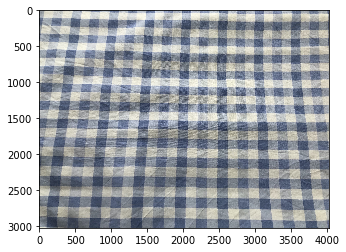

In [0]:
sample2 = cv2.imread("sample02-damaged.jpg")
mask2 = imread_mask("sample02-mask.jpg")

radius = 10
result2 = cv2.inpaint(sample2, mask2, radius, cv2.INPAINT_TELEA)

plt.imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))

# Sample 03

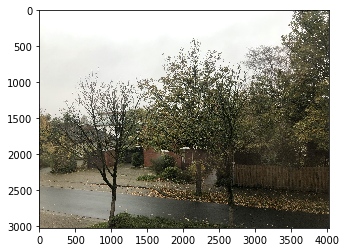

In [0]:
mask3 = imread_mask("sample03-mask.jpg")

radius = 10
result3 = cv2.inpaint(sample3, mask3, radius, cv2.INPAINT_TELEA)

plt.imshow(cv2.cvtColor(result3, cv2.COLOR_BGR2RGB))

# Observations from Samples 01-03

1. Using the `inpaint` method, only small damages can be repaired in a meaningful way. The method uses colors around the damage to restore the image's colors.
2. Small damages in high resolution images become nearly invisible when looking at the entire image.

# Build a mask automatically

1. The input image converted to grayscale (Book: Learning Image Processing with OpenCV Site 92 ISBN:978-1-78328-765-9), (https://www.jscholler.com/2019-02-28-remove-dots/)
2. Use the `threshold` method (Book: Learning Image Processing with OpenCV Site 92 ISBN:978-1-78328-765-9), (https://www.jscholler.com/2019-02-28-remove-dots/)
3. the color scale of damaged areas could be described very precisly (https://stackoverflow.com/questions/53838667/how-to-get-a-mask-of-an-image-so-that-i-can-use-it-in-the-inpainting-function)

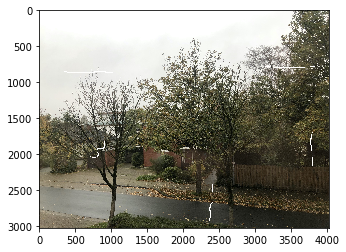

In [0]:
sample3 = cv2.imread("sample03-damaged.jpg")

plt.imshow(cv2.cvtColor(sample3, cv2.COLOR_BGR2RGB))

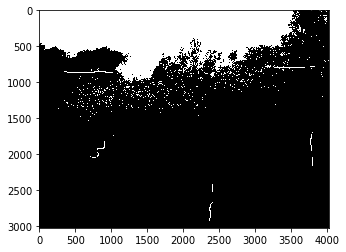

In [0]:
def create_mask(src):
  # convert image to grayscale
  mask = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
  # only use values above a given threshold
  (_, mask) = cv2.threshold(mask, 240, 255, cv2.THRESH_BINARY)
  return mask

img = cv2.imread("sample03-damaged.jpg")
mask = create_mask(img)

plt.imshow(mask, cmap='gray')

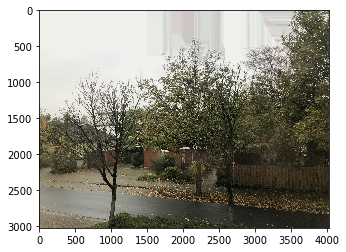

In [0]:
def restore_image(src, mask, radius=10):
  return cv2.inpaint(src, mask, radius, cv2.INPAINT_NS)

result = restore_image(img, mask)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

# Observations
1. Detection of damages using color values thresholds is a simple and yet effective method. Further research might produce a better method for mask creation.
2. As damages are defined as "white", bright section of images are often included in the mask. This restores healthy parts of such images and also prolongues the duration of the inpainting method.
3. The detected damaged areas cannot be resolved by the `inpaint` method

# 2nd approach at automatic mask building
Blurring the areas around the damaged areas could help the algorithm to restore the image (https://www.tutorialkart.com/opencv/python/opencv-python-gaussian-image-smoothing/)

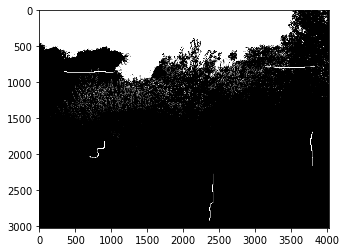

In [0]:
def create_mask(src):
  # convert image to grayscale
  mask = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
  # only use values above a given threshold
  (_, mask) = cv2.threshold(mask, 240, 255, cv2.THRESH_BINARY)
  # blur the mask
  mask = cv2.GaussianBlur(mask, (5, 5), 10)
  return mask

img = cv2.imread("sample03-damaged.jpg")
mask = create_mask(img)

plt.imshow(mask, cmap='gray')

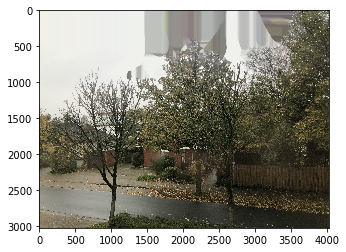

In [0]:
result = restore_image(img, mask)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

# Observation of Sample 4

* Different result in Colab than seen on local machine.
* Locally better results of damaged images.